In [1]:
import os
os.makedirs('output', exist_ok=True)

import sys
sys.path.append('../')

from utils import load_walksheds, overlay_wks

import geopandas as gpd
import pandas as pd
import os
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

os.makedirs('output', exist_ok=True)

In [2]:
plt.style.use('ggplot')

* load the walksheds containing the half-mile and 0.75 mile radius

In [3]:
wksp5, wksp75 = load_walksheds()

# Hotels

* Define Hotel tags as hotels and motels
* Get hotels from OSMNX
* Keep only the nodes
* Change the crs of the hotel points to match the walksheds
* Spatial join the hotels to the walksheds

In [4]:
tags = {'tourism': ['hotel', 'motel']}

hotels = ox.features.features_from_bbox(39.2, 38.5, -76.7, -77.6, tags)

In [5]:
hotels = hotels[hotels.index.get_level_values('element_type') == 'node']

<Axes: >

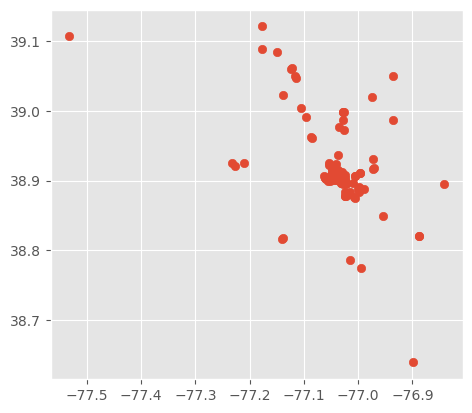

In [6]:
hotels.plot()

In [7]:
hotels = hotels.to_crs('EPSG:4326')

In [8]:
hotels_walkshed_p5 = gpd.sjoin(wksp5, hotels)
hotels_walkshed_p75 = gpd.sjoin(wksp75, hotels)

In [9]:
hotels_by_station_p5 = hotels_walkshed_p5.groupby('Name_1')['index_right1'].count().rename('hotelcount_p5').reset_index()
hotels_by_station_p75 = hotels_walkshed_p75.groupby('Name_1')['index_right1'].count().rename('hotelcount_p75').reset_index()

hotels_by_station_p5.to_csv('output/hotels_by_station_p5.csv')
hotels_by_station_p75.to_csv('output/hotels_by_station_p75.csv')

# Restaurants

* Define restaurant tag
* Get restaurants from OSMNX
* Keep only the nodes
* Change the crs of the restaurant points to match the walksheds
* Spatial join the restaurants to the walksheds
* Groupby the stations and sum
* Export

In [10]:
tags = {'amenity': 'restaurant'}
restaurants = ox.features.features_from_bbox(39.2, 38.5, -76.7, -77.6, tags)

In [11]:
restaurants.shape

(4319, 224)

In [12]:
restaurants = restaurants[restaurants.index.get_level_values('element_type') == 'node']

<Axes: >

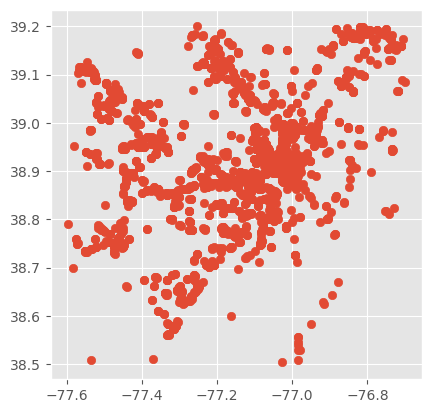

In [13]:
restaurants.plot()

In [14]:
restaurants = restaurants.to_crs('EPSG:4326')

In [15]:
restaurants_walkshed_p5 = gpd.sjoin(wksp5, restaurants)
restaurants_walkshed_p75 = gpd.sjoin(wksp75, restaurants)

In [16]:
restaurants_by_station_p5 = restaurants_walkshed_p5.groupby('Name_1')['index_right1'].count().rename('restaurantcount_p5').reset_index()
restaurants_by_station_p75 = restaurants_walkshed_p75.groupby('Name_1')['index_right1'].count().rename('restaurantcount_p75').reset_index()

restaurants_by_station_p5.to_csv('output/restaurants_by_station_p5.csv')
restaurants_by_station_p75.to_csv('output/restaurants_by_station_p75.csv')


# Entertainment Venues 

* Define entertainment tags as stadiums, tracks, pools, recreation fields, and venues related to the arts
* Get entertainment venues from OSMNX
* Keep only the nodes
* Change the crs of the entertainment points to match the walksheds
* Spatial join the entertainment venues to the walksheds
* Groupby the stations and sum
* Export

In [17]:
tags = {'leisure':['stadium', 'track', 'swimming pool', 'recreation_ground'], 'amenity': ['casino', 'arts_centre', 'cinema', 'community_centre', 'conference_centre', 'event_centre', 'theatre', 'social_centre', 'nightclub', 'music_venue']}
entertainment = ox.features.features_from_bbox(39.2, 38.5, -76.7, -77.6, tags)

In [18]:
entertainment = entertainment[entertainment.index.get_level_values('element_type') == 'node']

<Axes: >

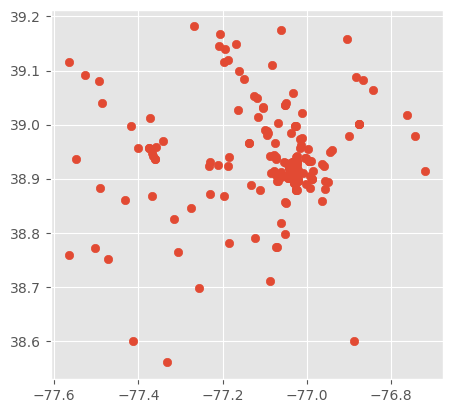

In [19]:
entertainment.plot()

In [20]:
entertainment = entertainment.to_crs('EPSG:4326')

In [21]:
entertainment_walkshed_p5 = gpd.sjoin(wksp5, entertainment)
entertainment_walkshed_p75 = gpd.sjoin(wksp75, entertainment)

In [22]:
entertainment_by_station_p5 = entertainment_walkshed_p5.groupby('Name_1')['index_right1'].count().rename('entertainmentcount_p5').reset_index()
entertainment_by_station_p75 = entertainment_walkshed_p75.groupby('Name_1')['index_right1'].count().rename('entertainmentcount_p75').reset_index()


entertainment_by_station_p5.to_csv('output/entertainment_by_station_p5.csv')
entertainment_by_station_p75.to_csv('output/entertainment_by_station_p75.csv')

<Axes: >

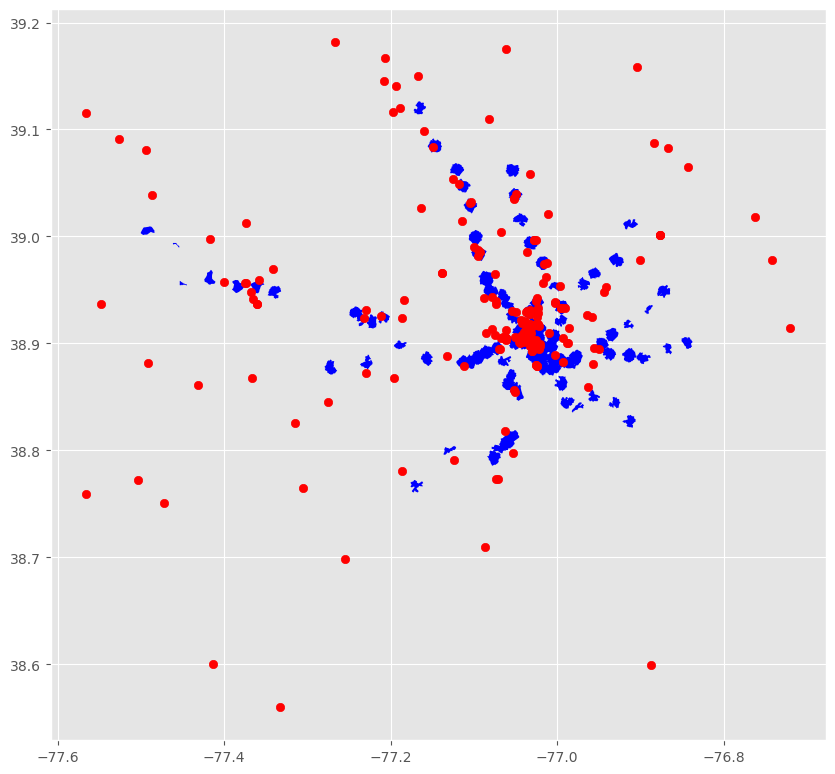

In [23]:
fig, ax = plt.subplots(figsize = (10,10))
wksp5.plot(ax=ax, color='blue')
entertainment.plot(ax=ax, color='red')
